In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.preprocessing import LabelEncoder, minmax_scale,OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Flatten,Dense
from scipy.sparse import issparse

data = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"
classes=[i for i in os.listdir(data) if "." not in i]
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [2]:
label=[]
path=[]
fish_dir = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"
for dir_name, _,filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1]==".png":
            if dir_name.split()[-1]!="GT":
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name,filename))

data = pd.DataFrame(columns=["path" , "label"])
data["path"]=path
data["label"]=label

data.head()

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel


In [3]:
x = data['path']  # Özellikler (görüntü yolları)
y = data['label']  # Etiketler (balık türleri)

# veri önişleme

In [4]:
def load_and_preprocess_image(image_path):
    # Resmi yükle ve yeniden boyutlandır
    img = load_img(image_path, target_size=(128, 128))  # 128x128 boyutuna getirelim
    img_array = img_to_array(img) / 255.0  # Normalize et
    return img_array


images = np.array([load_and_preprocess_image(path) for path in x])

In [5]:
images

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [6]:
images.shape

(9000, 128, 128, 3)

In [7]:
for i in range(3):
    print(y[i])

Hourse Mackerel
Hourse Mackerel
Hourse Mackerel


**Y yi numpy çevirme, reshape**

In [8]:
type(y)

pandas.core.series.Series

In [9]:
y=y.to_numpy()

In [10]:
type(y)

numpy.ndarray

In [11]:
y.shape

(9000,)

In [12]:
y=y.reshape(-1,1)

In [13]:
y.shape

(9000, 1)

In [14]:
type(y)

numpy.ndarray

# Label verimizi encode etmek

In [15]:
en=OneHotEncoder()

y=en.fit_transform(y)

# Veriyi Train-Val-Temporary ayırma

In [16]:
x_train,x_val , y_train,y_val= train_test_split(images,y, test_size=0.2)
x_val,x_temporary , y_val,y_temporary= train_test_split(x_val,y_val, test_size=0.5)

print(f"x_train:{x_train.shape}\nx_val:{x_val.shape}\ny_train:{y_train.shape}\ny_val:{y_val.shape}")
print(f"x_temporary:{x_temporary.shape}\ny_temporary:{y_temporary.shape}")

x_train:(7200, 128, 128, 3)
x_val:(900, 128, 128, 3)
y_train:(7200, 9)
y_val:(900, 9)
x_temporary:(900, 128, 128, 3)
y_temporary:(900, 9)


# Model oluşturma

In [17]:
model = tf.keras.Sequential()
model.add(Flatten(input_shape=(128,128,3)))

model.add(Dense(128, activation='relu'))  # First hidden layer with 128 units
model.add(Dense(64, activation='relu'))   # Second hidden layer with 64 units
model.add(Dense(32, activation='relu'))

model.add(Dense(9, activation='softmax')) #Output Layer

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,302,217 (24.04 MB)

 Trainable params: 6,302,217 (24.04 MB)

 Non-trainable params: 0 (0.00 B)

**Model.compile**

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# X ve Y verilerinin tiplerini düzeltmek. Y Sparse layerden Dense layer çevirme.

In [20]:
print(y_train.dtype)
print(x_train.dtype)

float64
float32


In [21]:
if issparse(y_train):
    print("y_train is a sparse array.")
else:
    print("y_train is not a sparse array.")

y_train is a sparse array.


In [22]:
if issparse(y_train):
    y_train = y_train.toarray()

y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)  # dense tensör ve float32 formatına dönüştür

**bütün Y verimizi spare tensordan dense tensora dönüştürmemiz lazım.**

In [23]:
#val için
y_val = y_val.toarray()
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32) 
#temporary için
y_temporary = y_temporary.toarray()
y_temporary = tf.convert_to_tensor(y_temporary, dtype=tf.float32) 

In [24]:
if issparse(y_train):
    print("y_train is a sparse array.")
else:
    print("y_train is not a sparse array.")

y_train is not a sparse array.


In [25]:
print(x_train.shape)
print(y_train.shape)

(7200, 128, 128, 3)
(7200, 9)


**Model.fit**

In [26]:
print(y_train.dtype)

<dtype: 'float32'>


In [27]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.2742 - loss: 0.4889 - val_accuracy: 0.6178 - val_loss: 0.2251
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.5991 - loss: 0.2237 - val_accuracy: 0.6311 - val_loss: 0.2037
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.7074 - loss: 0.1827 - val_accuracy: 0.7144 - val_loss: 0.1603
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.7524 - loss: 0.1561 - val_accuracy: 0.7833 - val_loss: 0.1336
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.8163 - loss: 0.1201 - val_accuracy: 0.8311 - val_loss: 0.1129
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8571 - loss: 0.1001 - val_accuracy: 0.8656 - val_loss: 0.0932
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.8747 - loss: 0.0889 - val_accuracy: 0.8300 - val_loss: 0.1094
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.8977 - loss: 0.0743 - 

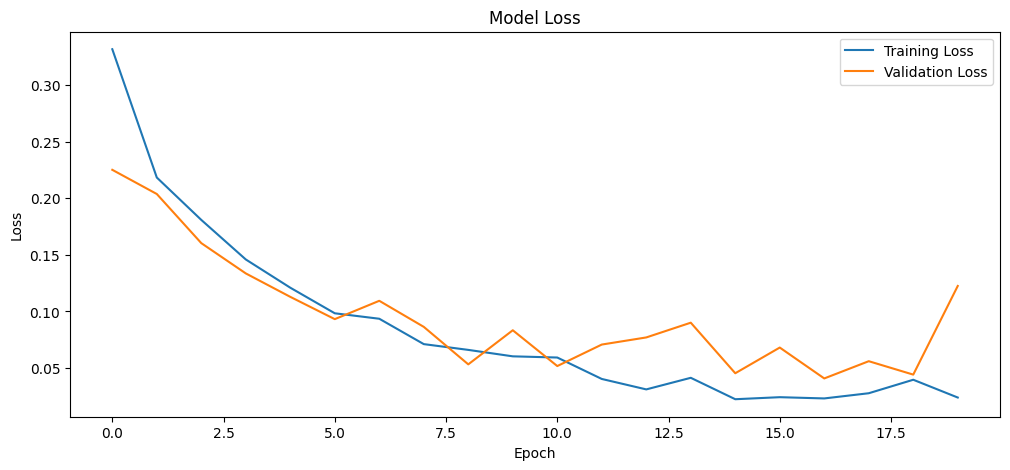

In [28]:
plt.figure(figsize=(12, 5))

# Eğitim ve doğrulama kayıplarını çizme
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Grafiği düzenleme
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()  # Legend ekle
plt.show()